## 1. Objective Penyelesaian  Masalah data.
- Prediksi Nilai Kontinu: Jika variabel target dalam dataset adalah nilai kontinu, maka objective-nya adalah untuk membangun model yang dapat memprediksi nilai tersebut berdasarkan fitur yang ada.

- Peningkatan Akurasi Model: Meningkatkan akurasi prediksi dengan menggunakan Gradient Boosted Trees, yang merupakan metode yang kuat dalam regresi. Ini bisa melibatkan tuning hyperparameter dan validasi model.

- Analisis Fitur Penting: Mengidentifikasi fitur-fitur yang paling berpengaruh terhadap variabel target. Ini bisa menjadi bagian dari analisis data eksplorasi untuk memahami hubungan antara fitur dan target.

- Generalization: Memastikan bahwa model yang dilatih tidak hanya bekerja baik pada data training tetapi juga dapat menggeneralisasi dengan baik pada data yang belum pernah dilihat (test set).

In [12]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install pandas scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.


### Memuat dataset

In [27]:
import pandas as pd

# Memuat dataset
data = pd.read_csv('train.csv')

# Melihat informasi dasar
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 2. Analisis Eksplorasi Data (EDA) 

#### Statistik Deskriptif

In [29]:
# Melihat statistik deskriptif
print(data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

#### Visualisasi Distribusi Variabel Target

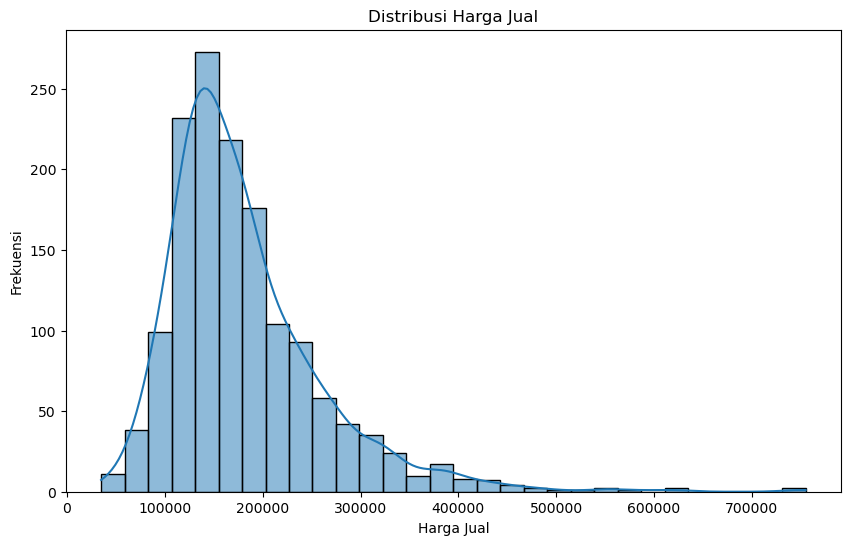

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi variabel target
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], bins=30, kde=True)
plt.title('Distribusi Harga Jual')
plt.xlabel('Harga Jual')
plt.ylabel('Frekuensi')
plt.show()

#### Visualisasi Hubungan Antara Fitur dan Target

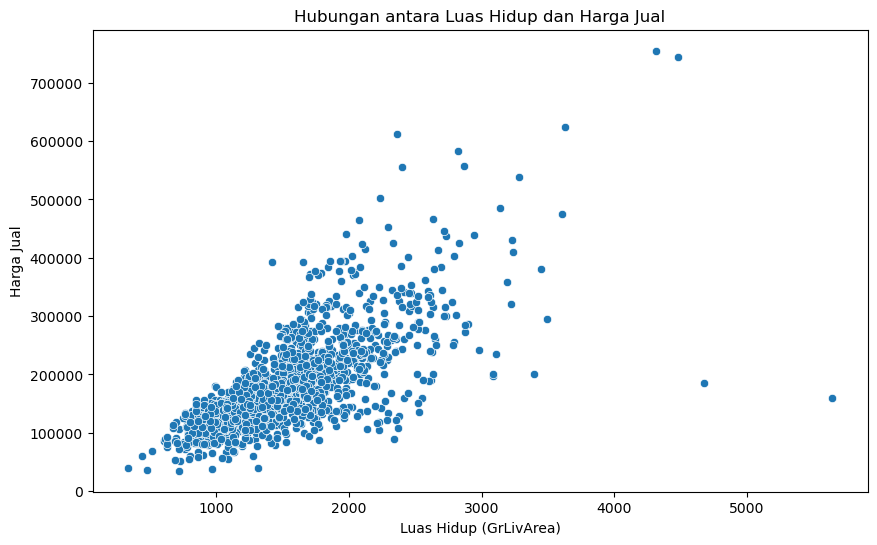

In [31]:
# Visualisasi hubungan antara GrLivArea dan SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.title('Hubungan antara Luas Hidup dan Harga Jual')
plt.xlabel('Luas Hidup (GrLivArea)')
plt.ylabel('Harga Jual')
plt.show()

#### Menangani Nilai Hilang

In [32]:
# Melihat kolom dengan nilai hilang
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


#### Mengisi nilai hilang

In [33]:
# Mengisi nilai hilang untuk kolom numerik dengan rata-rata
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Mengisi nilai hilang untuk kolom kategorikal dengan modus
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\augustio\AppData\Local\Temp\ipykernel_2976\4243518798.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


#### Encoding Kategorikal

In [34]:
# Encoding variabel kategorikal
data = pd.get_dummies(data, drop_first=True)

#### Membagi Data untuk Pelatihan dan Pengujian

In [35]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = data.drop('SalePrice', axis=1)  # Fitur
y = data['SalePrice']  # Target

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Membangun Model Prediksi

In [38]:
from sklearn.linear_model import LinearRegression

# Membangun model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Evaluasi Model

In [40]:
import pandas as pd
import numpy as np  # Impor numpy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


# Prediksi
y_pred = model.predict(X_test)

# Menghitung RMSE dan R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 51396.875520052534
R²: 0.6556028072510725


# 3. Bangun pipeline machine learning dengan berbagai model Gradient Boosted 

In [41]:
pip install pandas scikit-learn xgboost

In [42]:
import pandas as pd

# Memuat dataset
data = pd.read_csv('train.csv')

# Melihat kolom yang tersedia
print("Kolom dalam dataset:")
print(data.columns)

Kolom dalam dataset:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Gar

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Asumsikan df adalah dataset Anda
# Pisahkan fitur dan target
X = data.drop('SalePrice', axis=1)   
y = data['SalePrice']

# Pisahkan data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifikasi kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Buat preprocessor
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Buat model
model = RandomForestRegressor(random_state=42)

# Buat pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Prediksi
y_pred = pipeline.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Model Performance:')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

# Jika ingin melihat feature importance (untuk RandomForest)
if hasattr(pipeline.named_steps['regressor'], 'feature_importances_'):
    # Get feature names after preprocessing
    cat_features = (pipeline.named_steps['preprocessor']
                   .named_transformers_['cat']
                   .named_steps['onehot']
                   .get_feature_names_out(categorical_features))
    
    feature_names = np.concatenate([numeric_features, cat_features])
    
    # Get feature importances
    importances = pipeline.named_steps['regressor'].feature_importances_
    
    # Create feature importance DataFrame
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    
    # Sort by importance
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    print('\nTop 10 Most Important Features:')
    print(feature_importance.head(10))

# Function untuk membuat prediksi baru
def make_prediction(pipeline, new_data):
    """
    Membuat prediksi untuk data baru menggunakan pipeline yang sudah di-fit
    
    Parameters:
    pipeline: Fitted sklearn pipeline
    new_data: DataFrame dengan format yang sama dengan data training
    
    Returns:
    array of predictions
    """
    return pipeline.predict(new_data)

# Jika ingin menyimpan model
# import joblib
# joblib.dump(pipeline, 'model_pipeline.joblib')

Model Performance:
MSE: 864865777.1244
RMSE: 29408.6004
R2 Score: 0.8872

Top 10 Most Important Features:
        feature  importance
4   OverallQual    0.559384
16    GrLivArea    0.121342
12  TotalBsmtSF    0.035535
14     2ndFlrSF    0.034487
9    BsmtFinSF1    0.029508
13     1stFlrSF    0.026212
3       LotArea    0.016524
27   GarageArea    0.015567
26   GarageCars    0.012412
6     YearBuilt    0.012259


c:\Users\augustio\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [14, 29] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [46]:
pip install pipeline

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor  # Ganti ke Regressor
from xgboost import XGBRegressor  # Ganti ke Regressor
from sklearn.metrics import mean_squared_error, r2_score

# Memuat dataset
data = pd.read_csv('train.csv')

# Memisahkan fitur dan target
X = data.drop(columns=['SalePrice'])  # Ganti 'SalePrice' dengan nama kolom target Anda
y = data['SalePrice']  # Ganti 'SalePrice' dengan nama kolom target Anda

# Identifikasi kolom numerik dan kategori
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Membuat ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Membuat pipeline untuk Gradient Boosting
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('gb', GradientBoostingRegressor())  # Ganti ke Regressor
])

# Membuat pipeline untuk XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor(use_label_encoder=False, eval_metric='rmse'))  # Ganti ke Regressor
])

# Split data menjadi training dan validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Gradient Boosting
gb_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

# Evaluasi model
gb_pred = gb_pipeline.predict(X_val)
xgb_pred = xgb_pipeline.predict(X_val)

# Menghitung metrik evaluasi
gb_rmse = np.sqrt(mean_squared_error(y_val, gb_pred))
gb_r2 = r2_score(y_val, gb_pred)

xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_pred))
xgb_r2 = r2_score(y_val, xgb_pred)

# Menampilkan hasil
print("Gradient Boosting Regressor Performance:")
print("RMSE:", gb_rmse)
print("R²:", gb_r2)

print("\nXGBoost Regressor Performance:")
print("RMSE:", xgb_rmse)
print("R²:", xgb_r2)

c:\Users\augustio\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:19:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Regressor Performance:
RMSE: 26004.511407180555
R²: 0.9118375678869369

XGBoost Regressor Performance:
RMSE: 26509.719878188323
R²: 0.9083787202835083


# 4. Melakukan Optimisasi dengan Hyperparameter Tuning

In [54]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
